<a href="https://colab.research.google.com/github/nirmit27/ml-notebooks/blob/main/DL/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dogs** vs. **Cats**
> #### Binary image classification using **Transfer Learning**

### Importing the necessary modules

In [1]:
import os
from zipfile import ZipFile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mplimg

from sklearn.model_selection import train_test_split as tts

from PIL import Image
from google.colab.patches import cv2_imshow

### Importing the dataset

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 800M/814M [00:07<00:00, 145MB/s]
100% 814M/814M [00:07<00:00, 109MB/s]


#### Extracting the dataset from `.zip`

In [3]:
dpath = r"/content/dogs-vs-cats-redux-kernels-edition.zip"

with ZipFile(dpath, 'r') as zip:
  zip.extractall()

print("The dataset has been extracted!")

The dataset has been extracted!


#### Extracting the **training** and **testing** samples

In [4]:
train_path = r"/content/train.zip"
test_path = r"/content/test.zip"

with ZipFile(train_path, 'r') as zip1:
  zip1.extractall()

with ZipFile(test_path, 'r') as zip2:
  zip2.extractall()

print("The training and testing samples have been extracted.")

The training and testing samples have been extracted.


#### Enlisting the files in the samples
> The `files1` and `files2` lists hold the image titles.

In [5]:
tr_path = r"/content/train"
te_path = r"/content/test"

path1, dir1, files1 = next(os.walk(tr_path))
print(f"Number of TRAINING images : {len(files1)}")

path2, dir2, files2 = next(os.walk(te_path))
print(f"Number of TESTING images : {len(files2)}")

ctr_dog, ctr_cat = 0, 0

for file in files1:
  if file.startswith("cat"):
    ctr_cat += 1
  else:
    ctr_dog += 1

assert ctr_cat == ctr_dog, "The number of dog and cat images are NOT the same."

Number of TRAINING images : 25000
Number of TESTING images : 12500


### Image Processing

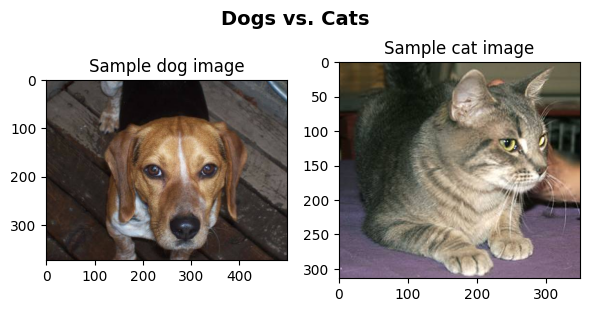

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
fig.suptitle("Dogs vs. Cats", fontweight='bold', fontsize=14)

img1 = mplimg.imread(f"{tr_path}/{files1[2]}")
img2 = mplimg.imread(f"{tr_path}/{files1[680]}")

axs[0].imshow(img1)
# axs[0].axis("off")
axs[0].set_title("Sample dog image")

axs[1].imshow(img2)
# axs[1].axis("off")
axs[1].set_title("Sample cat image")

plt.tight_layout()
plt.show()

#### **Resizing** all the images to a **common** size
> Taking `2000` images from the `train` directory

In [7]:
new_tr_path = r"/content/resized_train/"
os.mkdir(new_tr_path)

for i in range(2000):
  img_file = os.listdir(tr_path)[i]
  img_filepath = tr_path + '/' + img_file

  img = Image.open(img_filepath)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  new_img_filepath = new_tr_path + img_file
  img.save(new_img_filepath)

len(os.listdir(new_tr_path))

2000

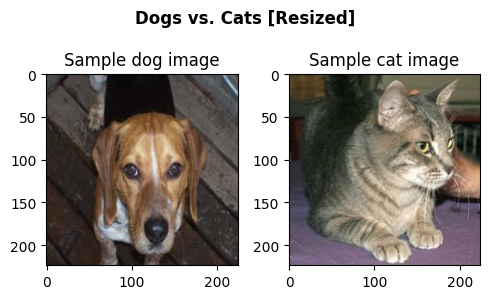

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(5, 3))
fig.suptitle("Dogs vs. Cats [Resized]", fontweight='bold')

img1 = mplimg.imread(f"{new_tr_path}/{files1[2]}")
img2 = mplimg.imread(f"{new_tr_path}/{files1[680]}")

axs[0].imshow(img1)
# axs[0].axis("off")
axs[0].set_title("Sample dog image")

axs[1].imshow(img2)
# axs[1].axis("off")
axs[1].set_title("Sample cat image")

plt.tight_layout()
plt.show()